## Load libraries

In [1]:
# data tools
import os
import numpy as np
import matplotlib.pyplot as plt

# sklearn tools
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

# tf tools
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, 
                                     MaxPooling2D, 
                                     Activation, 
                                     Flatten, 
                                     Dense)
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras import backend as K

KeyboardInterrupt: 

In [2]:
def plot_history(H, epochs):
    # H: history of the model, epochs
    # visualize performance
    plt.style.use("fivethirtyeight")
    plt.figure()
    plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.tight_layout()
    plt.show()

## Load cifar10 data

In [3]:
# import cifar 10 data (images, labels)
((trainX, trainY), (testX, testY)) = cifar10.load_data()
# normalising (scale between 0 and 1)
trainX = trainX.astype("float") / 255.
testX = testX.astype("float") / 255.

170500096/170498071 [==============================] - 6s 0us/step


In [37]:
trainY[0:3]

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [6]:
# integers to one-hot vectors
# explicitly binarizing labels (turning all labels into binary vector)
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

# initialize label names for CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", 
              "cat", "deer", "dog", "frog", "horse", 
              "ship", "truck"]

In [10]:
trainY[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [12]:
trainX.shape
# 32x32 with 3 colour channels

(50000, 32, 32, 3)

## ShallowNet 

ShallowNet architecture: </br>
>INPUT => CONV => ReLU => FC

- input, single covolutional layer, relu, fully connected layer = shallownet

In [18]:
# initialise model
model = Sequential()

# define CONV => RELU layer
# 32 = depth, 3x3 kernels,
model.add(Conv2D(32, (3, 3),  
                 padding="same", # layer of 0s outside (same for every row and column)
                 input_shape=(32, 32, 3))) # see shape above
# actiavation layer (relu)
model.add(Activation("relu"))

# softmax classifier
model.add(Flatten()) # flattening
model.add(Dense(10)) # fully connected network
model.add(Activation("softmax"))

__Compile model__

In [19]:
opt = SGD(lr =.01)
model.compile(loss="categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

__Model summary__

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                327690    
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 328,586
Trainable params: 328,586
Non-trainable params: 0
_________________________________________________________________


__Plot model__

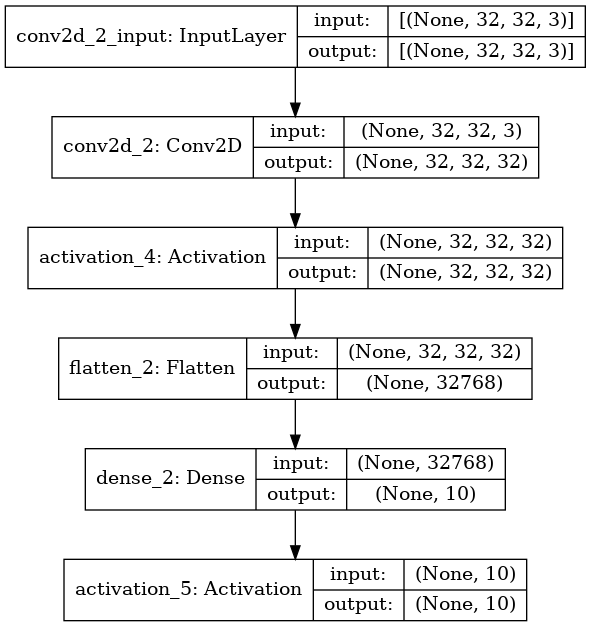

In [21]:
plot_model(model, show_shapes=True, show_layer_names=True)

__Train model__

In [ ]:
H = model.fit(trainX, trainY, 
              validation_data=(testX, testY), 
              batch_size=32,
              epochs=40,
              verbose=1)

__Evaluate model__

In [ ]:
predictions = model.predict(testX, batch_size=32)

In [ ]:
print(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=labelNames))

plot_model(H)

## LeNet

LeNet architecture:
>INPUT => CONV => ReLU => MAXPOOL => CONV => ReLU => MAXPOOL => FC => ReLU => FC

__Define model__

In [23]:
# define model
model = Sequential()

# first set of CONV => RELU => POOL
model.add(Conv2D(32, (3, 3), 
                 padding="same", 
                 input_shape=(32, 32, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2, 2)))

# second set of CONV => RELU => POOL
model.add(Conv2D(50, (5, 5), 
                 padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2, 2)))

# FC => RELU
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

# softmax classifier
model.add(Dense(10))
model.add(Activation("softmax"))

__Compile model__

In [24]:
opt = SGD(lr=0.01)
model.compile(loss="categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

__Model summary__

In [ ]:
model.summary()

__Plot model__

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

__Train model__

In [ ]:
# train model
H = model.fit(trainX, trainY, 
              validation_data=(testX, testY), 
              batch_size=32,
              epochs=20,
              verbose=1)

In [ ]:
plot_history(H,20)

In [ ]:
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=labelNames))